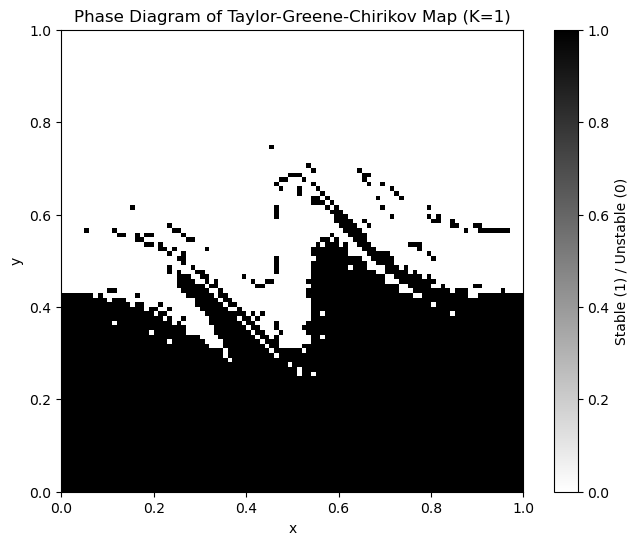

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def tgc_map(x, y, K):
    x_next = x + y - (K / (2 * np.pi)) * np.sin(2 * np.pi * x)
    y_next = y - (K / (2 * np.pi)) * np.sin(2 * np.pi * x_next)
    return x_next, y_next

def iterate_tgc_map(x0, y0, K, iterations):
    x_vals = [x0]
    y_vals = [y0]
    for _ in range(iterations):
        x_next, y_next = tgc_map(x_vals[-1], y_vals[-1], K)
        x_vals.append(x_next)
        y_vals.append(y_next)
    return x_vals, y_vals

# Parameters
K = 1  # Adjust as needed
iterations = 1000
grid_size = 100

# Generate initial conditions
x_range = np.linspace(0, 1, grid_size)
y_range = np.linspace(0, 1, grid_size)
X, Y = np.meshgrid(x_range, y_range)

# Iterate the map for each initial condition
phase_diagram = np.zeros_like(X)
for i in range(grid_size):
    for j in range(grid_size):
        x0, y0 = X[i, j], Y[i, j]
        x_vals, y_vals = iterate_tgc_map(x0, y0, K, iterations)
        if np.all(np.abs(x_vals) < 100) and np.all(np.abs(y_vals) < 100):
            phase_diagram[i, j] = 1

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(phase_diagram, extent=(0, 1, 0, 1), cmap='binary', origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Diagram of Taylor-Greene-Chirikov Map (K={})'.format(K))
plt.colorbar(label='Stable (1) / Unstable (0)')
plt.show()


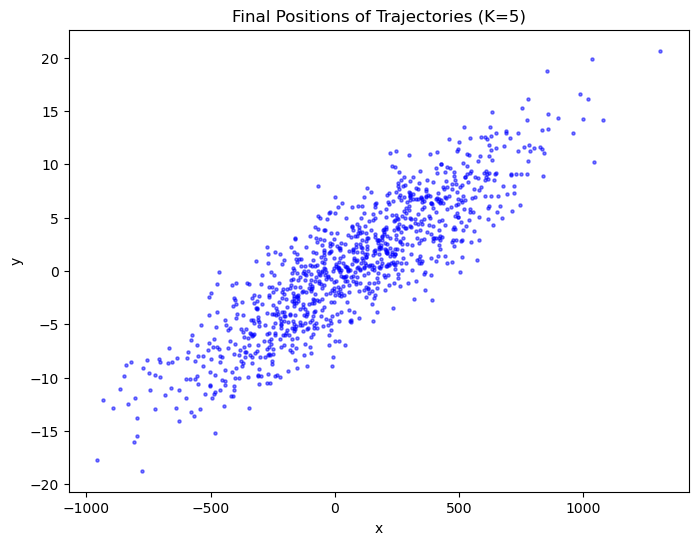

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def tgc_map(x, y, K):
    x_next = x + y - (K / (2 * np.pi)) * np.sin(2 * np.pi * x)
    y_next = y - (K / (2 * np.pi)) * np.sin(2 * np.pi * x_next)
    return x_next, y_next

def iterate_tgc_map(x0, y0, K, iterations):
    x = x0
    y = y0
    for _ in range(iterations):
        x, y = tgc_map(x, y, K)
    return x, y

# Parameters
K = 5  # High value for chaotic behavior
iterations = 100
num_trajectories = 1000

# Generate initial conditions
x_initial = np.random.rand(num_trajectories)
y_initial = np.random.rand(num_trajectories)

# Iterate the map for each initial condition
x_final = []
y_final = []
for i in range(num_trajectories):
    x, y = iterate_tgc_map(x_initial[i], y_initial[i], K, iterations)
    x_final.append(x)
    y_final.append(y)

# Plot final positions
plt.figure(figsize=(8, 6))
plt.scatter(x_final, y_final, s=5, c='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Positions of Trajectories (K={})'.format(K))
plt.show()
